In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
#Read files
stress_data=pd.read_csv('combined_data.csv')

In [109]:
stress_data.head()

,Unnamed: 0,id,time,x,y,z,hr,bvp,eda,temp,label
0,0,0,0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,1,0,1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,2,0,2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,3,0,3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,4,0,4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


In [110]:
stress_data.drop(columns=['Unnamed: 0','id','time'],inplace=True)

In [111]:
## Renaming the Accelerometer data columns
stress_data.columns=('ACC_X','ACC_Y','ACC_Z','hr','bvp','eda','temp','stress_label')

In [112]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


In [113]:
stress_data['acc_mag']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2+stress_data.ACC_Z**2)
stress_data['acc_xy_sqrt']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2)

In [114]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0,61.470506,4.819901
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0,63.646930,7.887948
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0,64.008010,6.701285
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0,63.849509,9.383382
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0,64.237429,15.731915


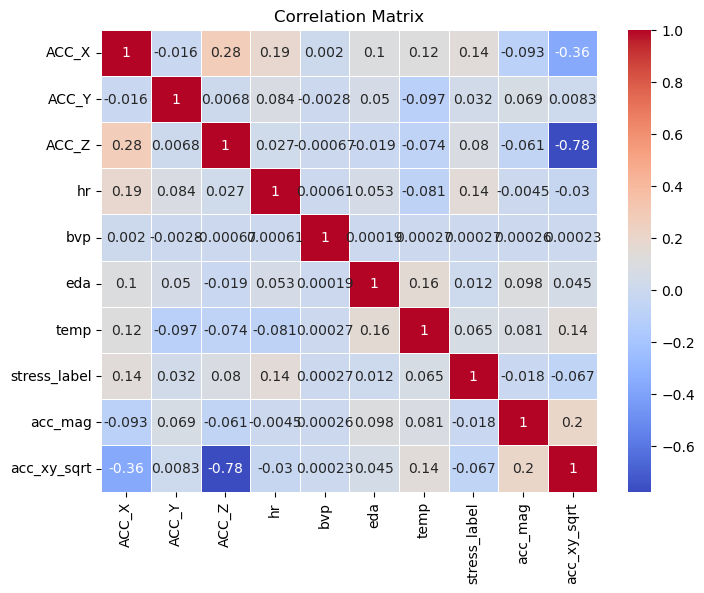

In [115]:

corr_matrix = stress_data[['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','stress_label','acc_mag','acc_xy_sqrt']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

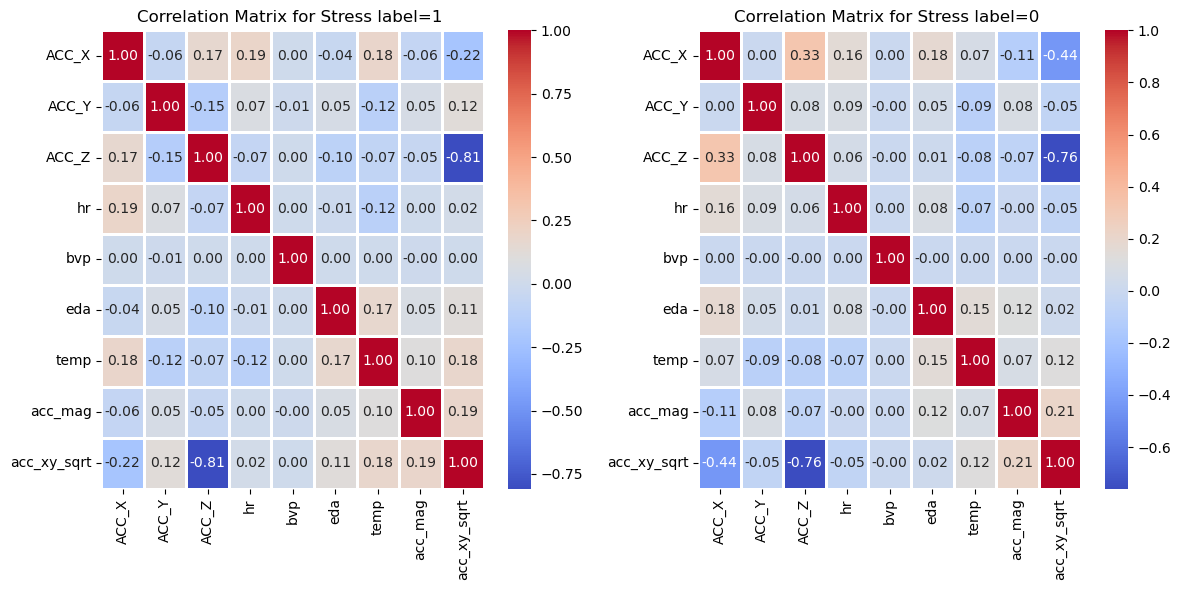

In [116]:
conditions = [
    {'stress_label': 1,  'title': 'Stress label=1 '},
    {'stress_label': 0,  'title': 'Stress label=0 '}
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, condition in enumerate(conditions):
    corr_matrix = stress_data[
        (stress_data['stress_label'] == condition['stress_label']) 
    ][['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','acc_mag','acc_xy_sqrt']].corr()

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        xticklabels=True,
        yticklabels=True,
        fmt=".2f",
        linewidths=2,
        ax=ax[i]
    )
    
    ax[i].set_title(f'Correlation Matrix for {condition["title"]}')

plt.tight_layout()

plt.show()

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [118]:
feature=stress_data.drop(columns=['stress_label'])

In [119]:
target=stress_data.stress_label

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(feature, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))
print("Validation set size: ", len(X_val))


Training set size:  96050
Test set size:  20583
Validation set size:  20583


#### Logistic Regression Modeling

Training set size:  96050
Test set size:  20583
Validation set size:  20582


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 1.0963 seconds
Accuracy Score: 0.6609658925274512
Confusion Matrix:
 [[12597   709]
 [ 6269  1007]]
ROC AUC Score: 0.6183008558143424
F1 Score: 0.22397686832740213
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78     13306
           1       0.59      0.14      0.22      7276

    accuracy                           0.66     20582
   macro avg       0.63      0.54      0.50     20582
weighted avg       0.64      0.66      0.59     20582

Brier Score Loss: 0.21928397240268754
Log Loss: 0.6287256933011514
Precision Score: 0.5868298368298368


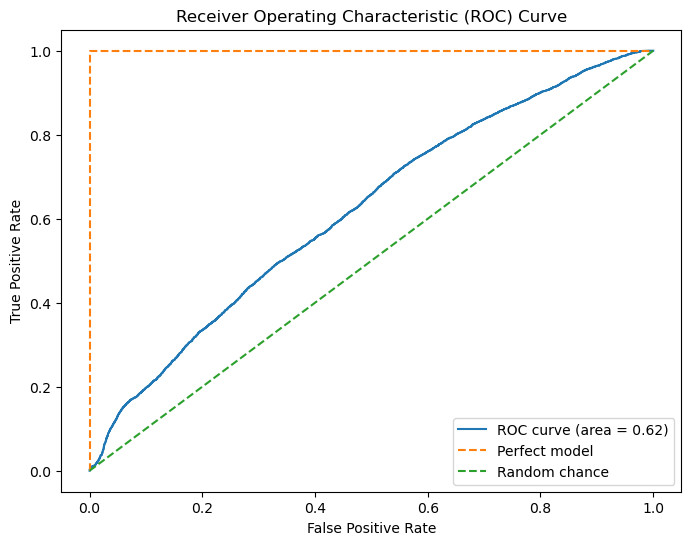

In [148]:
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score,
    precision_recall_curve, classification_report, brier_score_loss, log_loss,
    precision_score
)
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(feature, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))
print("Validation set size: ", len(X_valid))


start_time = time.time()
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions on the validation set
y_valid_pred = model.predict(X_valid)
y_valid_proba = model.predict_proba(X_valid)[:, 1]

# Metrics Evaluation
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_mat = confusion_matrix(y_valid, y_valid_pred)
fpr, tpr, _ = roc_curve(y_valid, y_valid_proba)
roc_auc = roc_auc_score(y_valid, y_valid_proba)
f1 = f1_score(y_valid, y_valid_pred)
precision, recall, _ = precision_recall_curve(y_valid, y_valid_proba)
report = classification_report(y_valid, y_valid_pred)
brier_score = brier_score_loss(y_valid, y_valid_proba)
logloss = log_loss(y_valid, y_valid_proba)
precision_score_value = precision_score(y_valid, y_valid_pred)

print("Training time: {:.4f} seconds".format(training_time))
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Classification Report:\n", report)
print("Brier Score Loss:", brier_score)
print("Log Loss:", logloss)
print("Precision Score:", precision_score_value)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='Perfect model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#### testing with test dataset

In [149]:
# Predictions on the test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Metrics Evaluation on Test Data
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_mat_test = confusion_matrix(y_test, y_test_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, y_test_pred)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
report_test = classification_report(y_test, y_test_pred)
brier_score_test = brier_score_loss(y_test, y_test_proba)
logloss_test = log_loss(y_test, y_test_proba)
precision_score_test = precision_score(y_test, y_test_pred)

# Output the results for the test dataset
print("Test Data Metrics:")
print("Accuracy Score:", accuracy_test)
print("Confusion Matrix:\n", conf_mat_test)
print("ROC AUC Score:", roc_auc_test)
print("F1 Score:", f1_test)
print("Classification Report:\n", report_test)
print("Brier Score Loss:", brier_score_test)
print("Log Loss:", logloss_test)
print("Precision Score:", precision_score_test)




Test Data Metrics:
Accuracy Score: 0.661759704610601
Confusion Matrix:
 [[12660   711]
 [ 6251   961]]
ROC AUC Score: 0.6154251303296141
F1 Score: 0.21634398919405673
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78     13371
           1       0.57      0.13      0.22      7212

    accuracy                           0.66     20583
   macro avg       0.62      0.54      0.50     20583
weighted avg       0.64      0.66      0.59     20583

Brier Score Loss: 0.21886190030890768
Log Loss: 0.6278620897442463
Precision Score: 0.5747607655502392


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (AUC): 0.618367737967586
Grid Search Training Time: 384.5255 seconds
Validation Data Metrics:
Accuracy: 0.6611, Precision: 0.6278, Recall: 0.5425, F1 Score: 0.5032
ROC AUC Score: 0.6183, Log Loss: 0.6287, Brier Score Loss: 0.2193
Validation Evaluation Time: 0.0183 seconds
Test Data Metrics:
Accuracy Score: 0.6610630648139151
Confusion Matrix:
 [[12597   709]
 [ 6269  1007]]
ROC AUC Score: 0.6182604692836366
F1 Score: 0.5032044585504175
Brier Score Loss: 0.21929218234038306
Log Loss: 0.6287399995410078
Precision Score: 0.6278418204960241


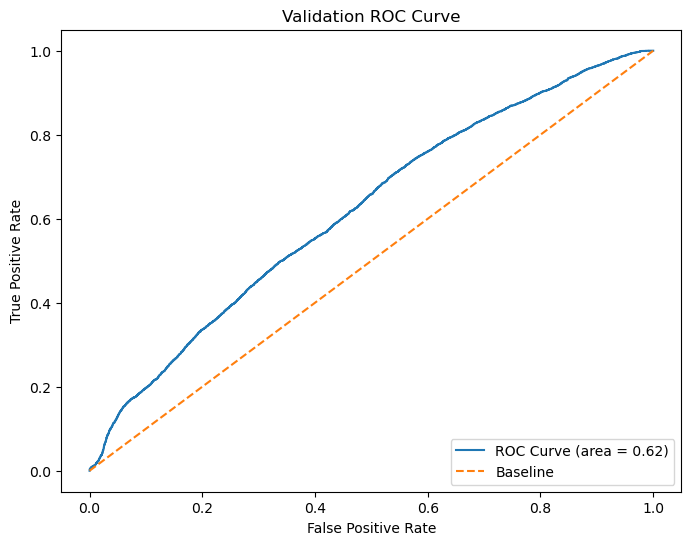

Test Data Metrics:
Accuracy: 0.6613, Precision: 0.6206, Recall: 0.5394, F1 Score: 0.4993
ROC AUC Score: 0.6154, Log Loss: 0.6278, Brier Score Loss: 0.2189
Test Evaluation Time: 0.0180 seconds
Test Data Metrics:
Accuracy Score: 0.6612738667832677
Confusion Matrix:
 [[12597   709]
 [ 6269  1007]]
ROC AUC Score: 0.6154406439080811
F1 Score: 0.4992964000339979
Brier Score Loss: 0.2188536819429654
Log Loss: 0.627839673177124
Precision Score: 0.6206155442026127


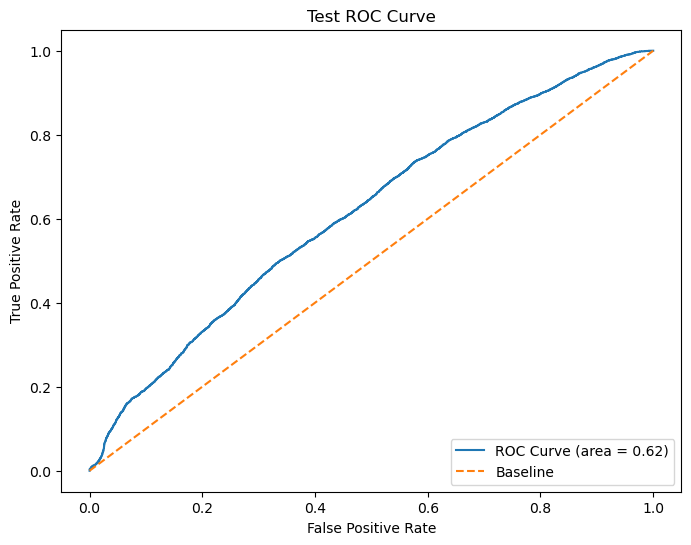

In [141]:
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, classification_report, brier_score_loss, log_loss
)
import matplotlib.pyplot as plt


# Define the model and parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear is good for l1 and l2 penalty
}
log_reg = LogisticRegression(random_state=42)


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
grid_search_duration = time.time() - start_time


best_log_reg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (AUC):", grid_search.best_score_)
print(f"Grid Search Training Time: {grid_search_duration:.4f} seconds")

# Evaluation function
def evaluate_model(model, X, y, dataset_type="Validation"):
    start_time = time.time()
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    evaluation_duration = time.time() - start_time

    # Metrics calculation
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    roc_auc = roc_auc_score(y, y_proba)
    logloss = log_loss(y, y_proba)
    brier_score = brier_score_loss(y, y_proba)
    
    print("Test Data Metrics:")
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:\n", conf_mat)
    print("ROC AUC Score:", roc_auc)
    print("F1 Score:", f1)
    #print("Classification Report:\n", report)
    print("Brier Score Loss:", brier_score)
    print("Log Loss:", logloss)
    print("Precision Score:", precision)


    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{dataset_type} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate on validation dataset
evaluate_model(best_log_reg, X_valid, y_valid, "Validation")

# Evaluate on test dataset
evaluate_model(best_log_reg, X_test, y_test, "Test")


Feature Importance:
              importance  normalized_importance
temp           0.067720               1.015136
hr             0.019778               0.296469
ACC_Z          0.006667               0.099939
ACC_X          0.006290               0.094290
ACC_Y          0.003637               0.054512
acc_xy_sqrt    0.002571               0.038541
bvp           -0.000080              -0.001195
acc_mag       -0.019189              -0.287652
eda           -0.020683              -0.310041


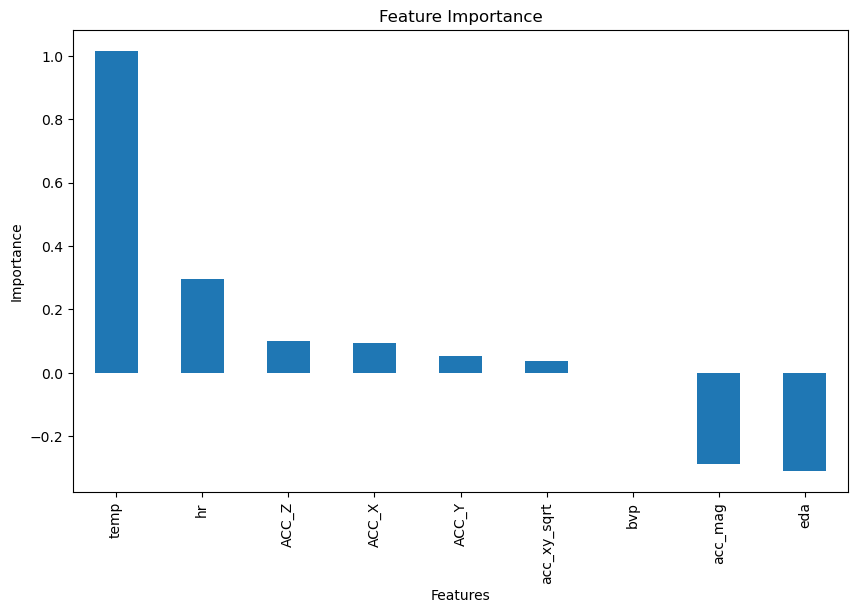

In [131]:
feature_importance = pd.DataFrame(model.coef_[0],
                                  index = feature.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

# Normalize the feature importance to make them easier to interpret
feature_importance['normalized_importance'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Print feature importance
print("Feature Importance:\n", feature_importance)

# Visualizing Feature Importance
import matplotlib.pyplot as plt

feature_importance['normalized_importance'].plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


Training time: 0.1811 seconds
validation set Accuracy: 0.6573219317850549
validation set Precision: 0.6146091172477135
validation set Recall: 0.5393971536647378
validation set F1 Score: 0.5003212607427902
validation set ROC AUC Score: 0.6213073386478565
validation set Log Loss: 0.6288025418909979
validation set Brier Score Loss: 0.21937530995058138
validation set Confusion Matrix:
 [[12533   773]
 [ 6280   996]]
validation setClassification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78     13306
           1       0.56      0.14      0.22      7276

    accuracy                           0.66     20582
   macro avg       0.61      0.54      0.50     20582
weighted avg       0.63      0.66      0.58     20582



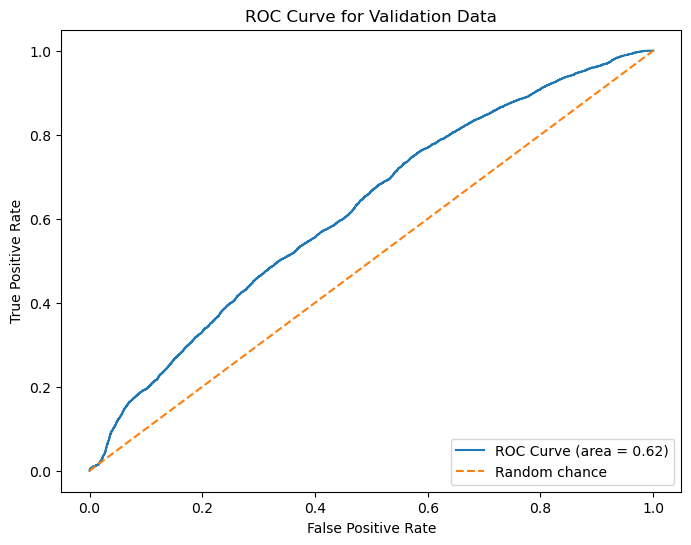

In [133]:
important_features = ['temp', 'hr', 'ACC_Z', 'ACC_X', 'ACC_Y']
X_important = feature[important_features]

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_important, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42)
start_time = time.time()
model.fit(X_train, y_train)
training_duration = time.time() - start_time

# Predictions and probabilities on the validation set
y_valid_pred = model.predict(X_valid)
y_valid_proba = model.predict_proba(X_valid)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred, average='macro')
recall = recall_score(y_valid, y_valid_pred, average='macro')
f1 = f1_score(y_valid, y_valid_pred, average='macro')
roc_auc = roc_auc_score(y_valid, y_valid_proba)
logloss = log_loss(y_valid, y_valid_proba)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
report = classification_report(y_valid, y_valid_pred)
brier_score = brier_score_loss(y_valid, y_valid_proba)

# Output the results
print("Training time: {:.4f} seconds".format(training_duration))
print("validation set Accuracy:", accuracy)
print("validation set Precision:", precision)
print("validation set Recall:", recall)
print("validation set F1 Score:", f1)
print("validation set ROC AUC Score:", roc_auc)
print("validation set Log Loss:", logloss)
print("validation set Brier Score Loss:", brier_score)
print("validation set Confusion Matrix:\n", conf_matrix)
print("validation setClassification Report:\n", report)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_valid, y_valid_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Data')
plt.legend(loc="lower right")
plt.show()


Test Data Metrics:
Test set Accuracy: 0.6618
Test set Precision: 0.6221
Test set Recall: 0.5400
Test set F1 Score: 0.5003
Test set ROC AUC Score: 0.6154
Test set Log Loss: 0.6279
Test set Brier Score Loss: 0.2189
Test set Confusion Matrix:
 [[12660   711]
 [ 6251   961]]
Test set Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78     13371
           1       0.57      0.13      0.22      7212

    accuracy                           0.66     20583
   macro avg       0.62      0.54      0.50     20583
weighted avg       0.64      0.66      0.59     20583



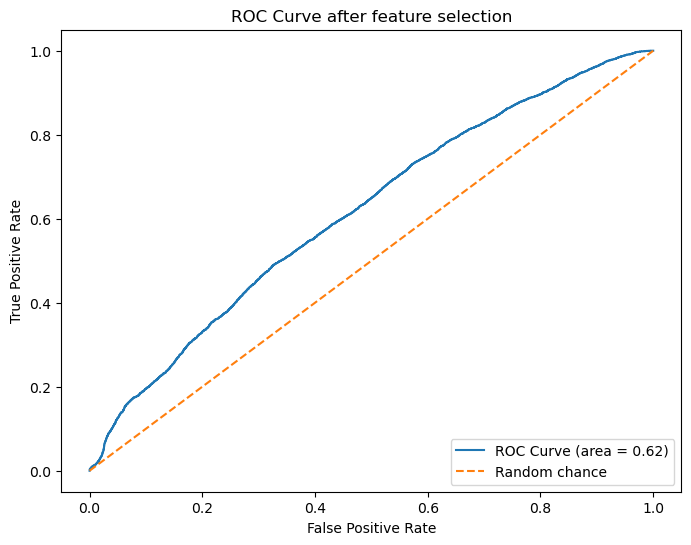

In [140]:
# Predictions and probabilities on the test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')
roc_auc_test = roc_auc_score(y_test, y_test_proba)
logloss_test = log_loss(y_test, y_test_proba)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
brier_score_test = brier_score_loss(y_test, y_test_proba)

# Output the results for the test dataset
print("Test Data Metrics:")
print(f"Test set Accuracy: {accuracy_test:.4f}")
print(f"Test set Precision: {precision_test:.4f}")
print(f"Test set Recall: {recall_test:.4f}")
print(f"Test set F1 Score: {f1_test:.4f}")
print(f"Test set ROC AUC Score: {roc_auc_test:.4f}")
print(f"Test set Log Loss: {logloss_test:.4f}")
print(f"Test set Brier Score Loss: {brier_score_test:.4f}")
print("Test set Confusion Matrix:\n", conf_matrix_test)
print("Test set Classification Report:\n", report_test)

# Plot ROC Curve for Test Data
plt.figure(figsize=(8, 6))
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after feature selection')
plt.legend(loc="lower right")
plt.show()


In [142]:
X_train.head(6)

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
76161,-32.21875,-26.84375,49.40625,68.60,4.952969,0.071135,32.49,64.804416,41.936080
97056,-26.53125,4.15625,57.46875,75.22,2.952969,0.267782,32.65,63.433736,26.854825
46254,21.81250,-59.00000,-10.53125,65.67,0.760000,0.138962,31.29,63.778463,62.902982
108076,-1.00000,-6.62500,63.12500,81.18,4.299688,0.265502,35.27,63.479573,6.700047
106643,-28.78125,15.68750,55.87500,85.58,-0.093906,0.342115,35.34,64.780195,32.778926
30195,-14.00000,36.00000,50.62500,86.97,-1.445156,0.218133,28.01,63.678023,38.626416


In [143]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

In [144]:
X_val.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
11616,-32.12500,-34.75000,43.40625,75.13,-24.435938,4.474680,29.77,64.215891,47.324181
42888,-48.00000,36.00000,25.00000,89.92,-4.015313,0.330550,31.51,65.000000,60.000000
96893,-30.00000,3.34375,56.00000,74.70,8.700000,0.258813,32.79,63.617456,30.185769
76440,-8.68750,-0.43750,61.59375,67.75,13.526875,0.096449,32.34,62.204936,8.698509
23852,-28.03125,-38.00000,43.06250,116.02,-4.586406,1.005220,29.53,63.907197,47.220239


In [145]:
y_val.head()

11616    0
42888    0
96893    0
76440    0
23852    0
Name: stress_label, dtype: int64

In [146]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

print('Resampled dataset after ADASYN shape %s' % Counter(y_ada))

Resampled dataset after ADASYN shape Counter({1: 63884, 0: 62273})


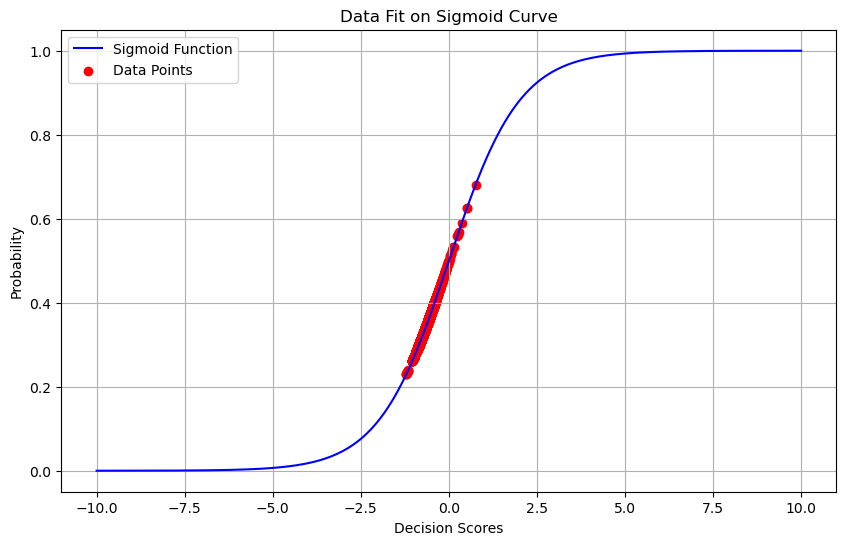

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values and compute sigmoid values
x_range = np.linspace(-10, 10, 400)
sigmoid_values = sigmoid(x_range)

# Calculate decision scores for your test data
decision_scores = model_imp.decision_function(X_test_imp)

# Calculate the sigmoid of these scores to get probabilities
probabilities = sigmoid(decision_scores)

# Plotting the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_range, sigmoid_values, label='Sigmoid Function', color='blue')

# Scatter plot of your test data's transformed decision scores
plt.scatter(decision_scores, probabilities, color='red', label='Data Points')

plt.title('Data Fit on Sigmoid Curve')
plt.xlabel('Decision Scores')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()
